#CONTENTS :
1 ) Exploratory Data Analysis

2 ) Corelation b/w Features

3 ) Feature Selection

4 ) Preparing Dataset

5 ) Making Predictions Using an Artificial Neural Network (ANN)

6 ) Hyperparameter Tuning

7 ) Conclusions

In [4]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

# ann and dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

In [5]:
df=pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [7]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

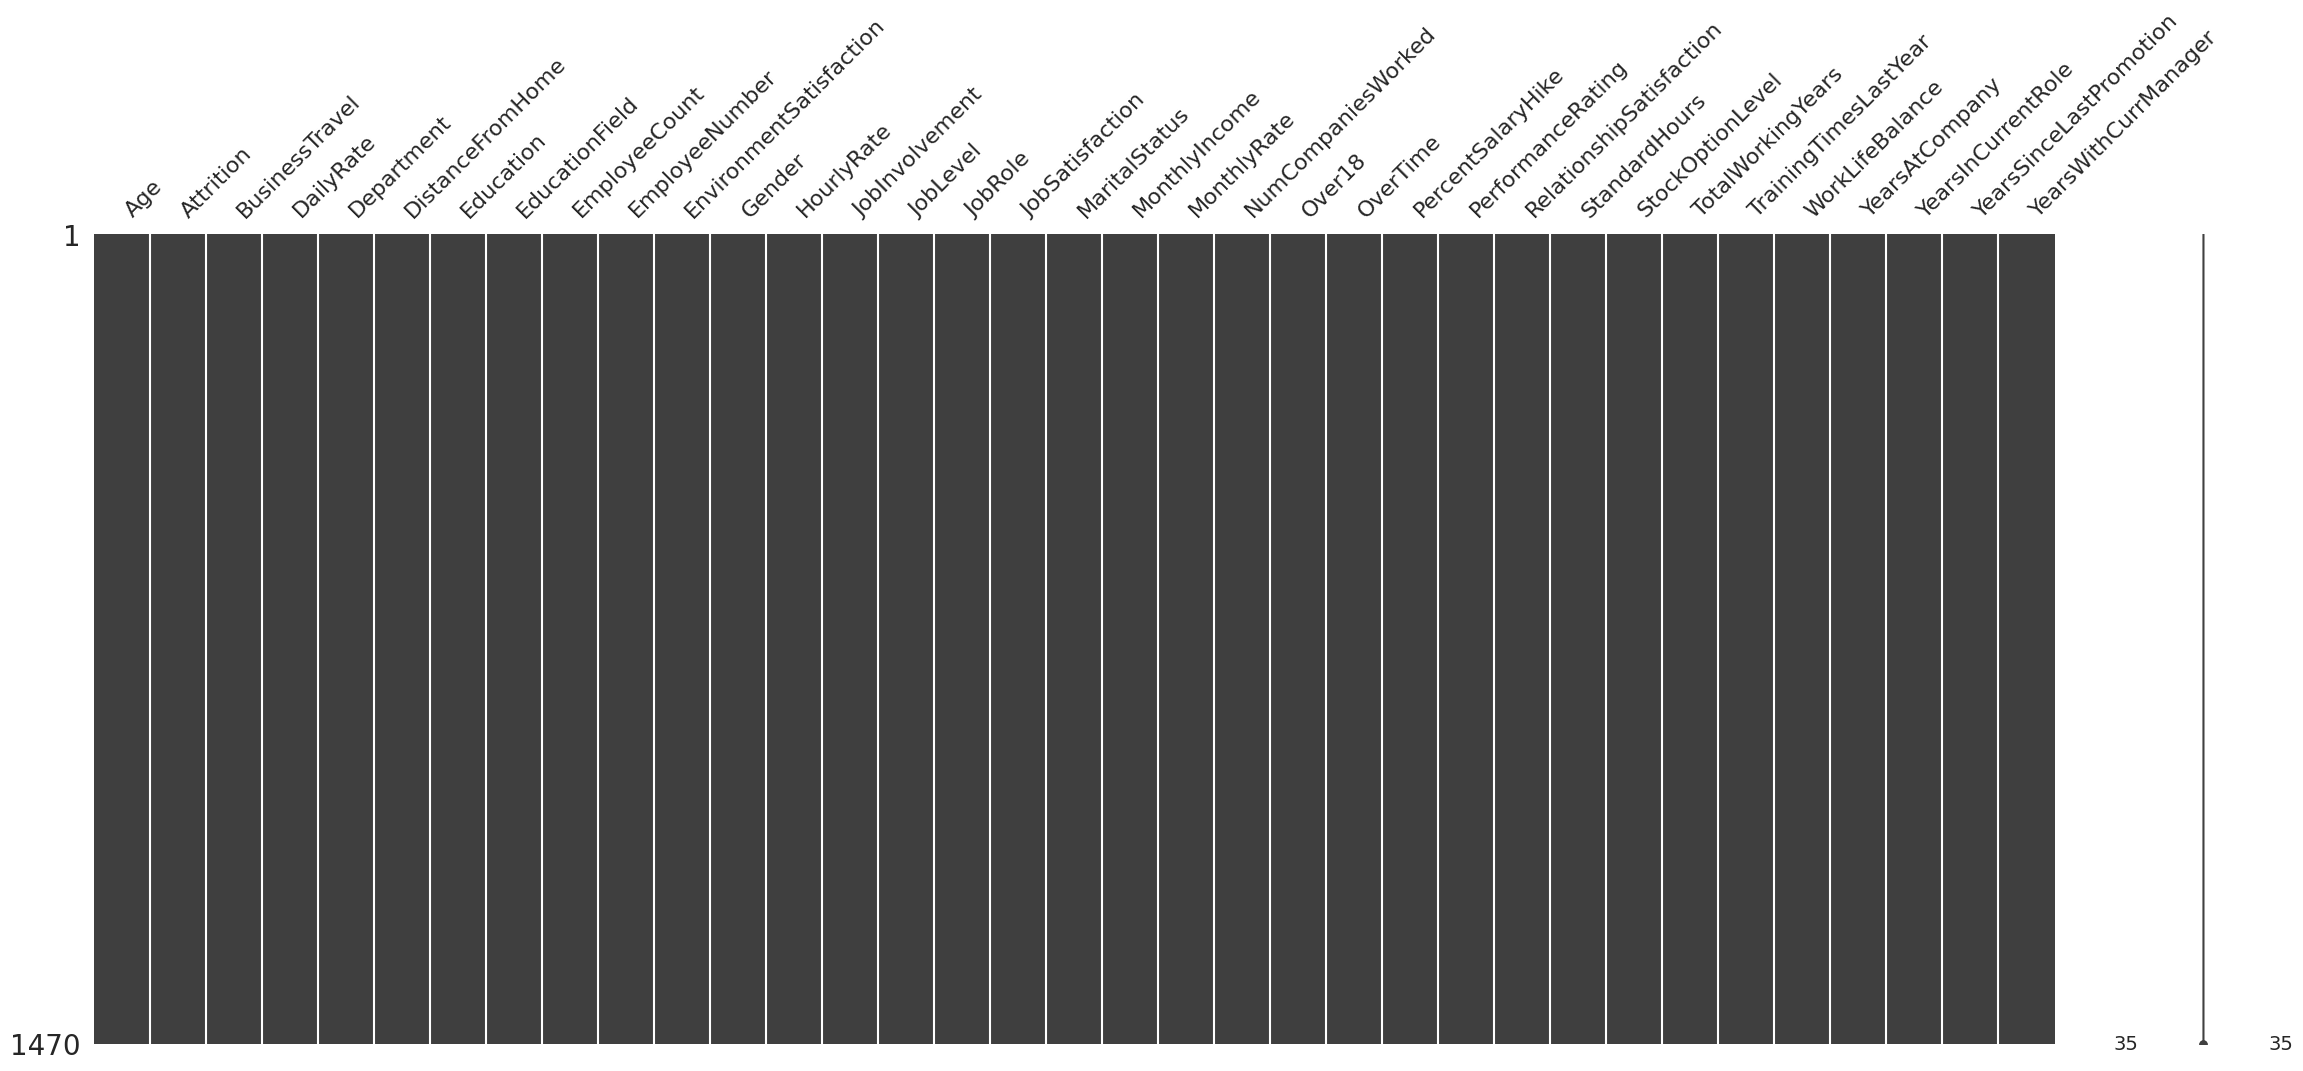

In [11]:
msno.matrix(df)

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

Hence this is a Binary Classification problem.

#Univariate Analysis
In this section I have done the univariate analysis i.e. I have analysed the range or distribution of the values that various features take. To better analyze the results I have plotted various graphs and visualizations wherever necessary.

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let us first analyze the various numeric features. To do this we can actually plot a boxplot showing all the numeric features.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EmployeeCount'),
  Text(5, 0, 'EmployeeNumber'),
  Text(6, 0, 'EnvironmentSatisfaction'),
  Text(7, 0, 'HourlyRate'),
  Text(8, 0, 'JobInvolvement'),
  Text(9, 0, 'JobLevel'),
  Text(10, 0, 'JobSatisfaction'),
  Text(11, 0, 'MonthlyIncome'),
  Text(12, 0, 'MonthlyRate'),
  Text(13, 0, 'NumCompaniesWorked'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text(20, 0, 'TrainingTimesLastYear'),
  Text(21, 0, 'WorkLifeBalance'),
  Text(22, 0, 'YearsAtCompany'),
  Text(23, 0, 'YearsInCurrentRole'),
  Text(24, 0, 'YearsSinceLastPromotion'),
  Text(25, 0, 'YearsWithCurrManager')])

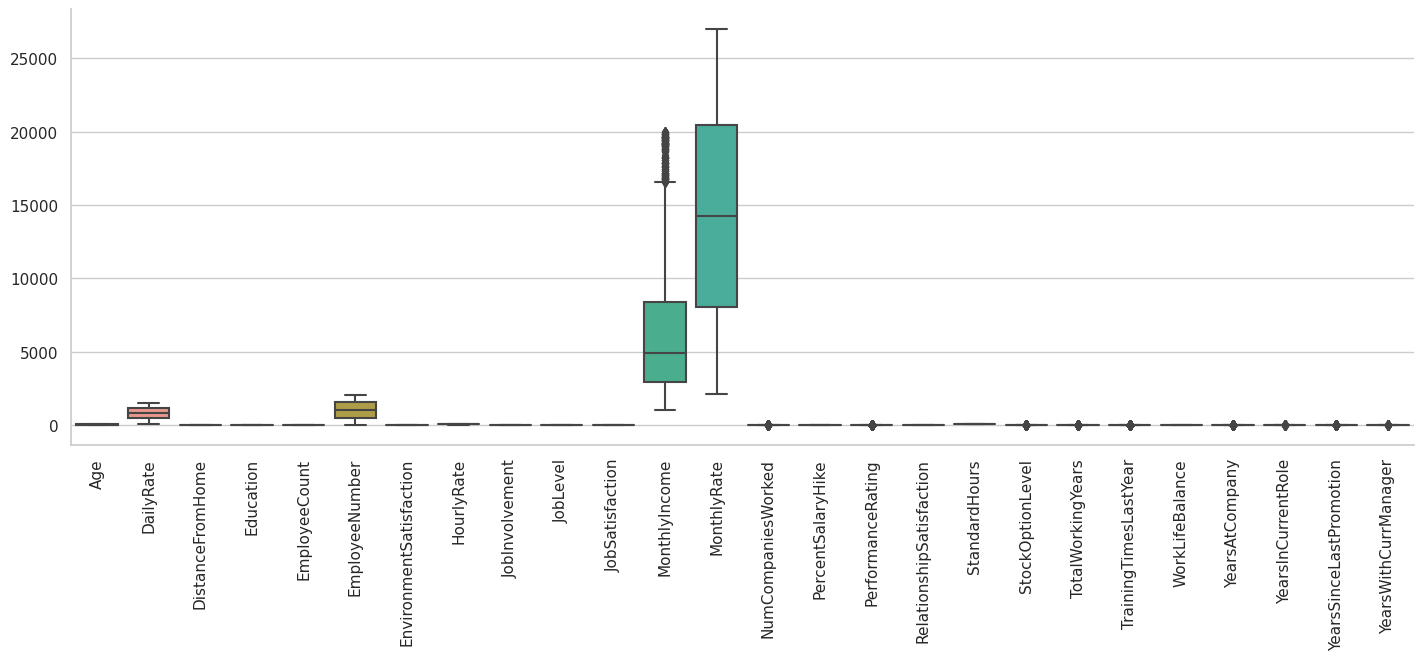

In [41]:
sns.catplot(data=df,kind='box',aspect=3)
plt.xticks(rotation=90)

We can also plot a kdeplot showing the distribution of the feature. Below I have plotted a kdeplot for the 'Age' feature. Similarly we plot for other numeric features also. We can also use a distplot from seaborn library.

<Axes: xlabel='Age', ylabel='Density'>

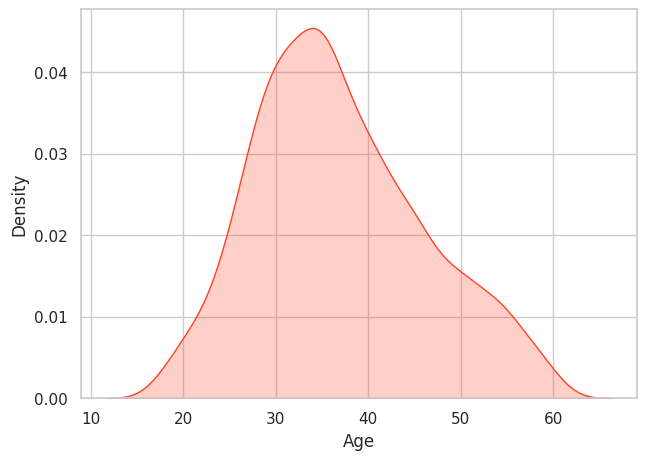

In [20]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')

<Axes: xlabel='Age', ylabel='Density'>

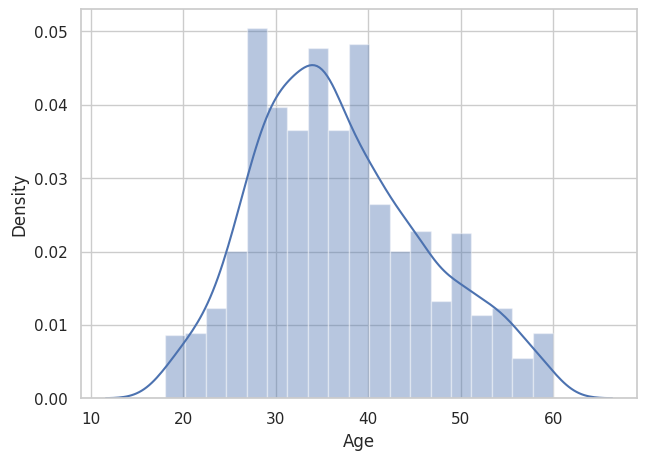

In [21]:
sns.distplot(df['Age'])

Similarly we can do this for all the numerical features. Below I have plotted the subplots for the other features.

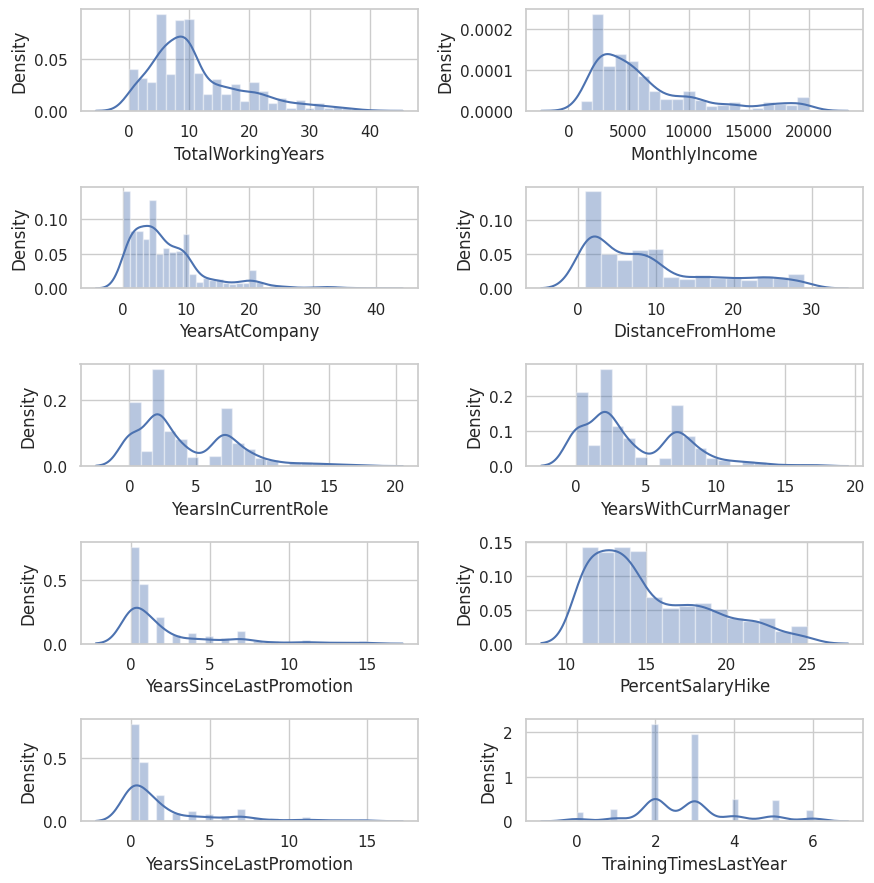

In [22]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(df['MonthlyIncome'], ax = ax[0,1])
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])
sns.distplot(df['DistanceFromHome'], ax = ax[1,1])
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0])
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0])
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

Let us now analyze the various categorical features. Note that in these cases the best way is to use a count plot to show the relative count of observations of different categories.

In [23]:
cat_df=df.select_dtypes(include='object')

In [24]:
cat_df.columns


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [33]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.countplot(data=df,x=attr)
        return

    sns.countplot(data=df,x=attr)

I have made a function that accepts the name of a string. In our case this string will be the name of the column or attribute which we want to analyze. The function then plots the countplot for that feature which makes it easier to visualize.

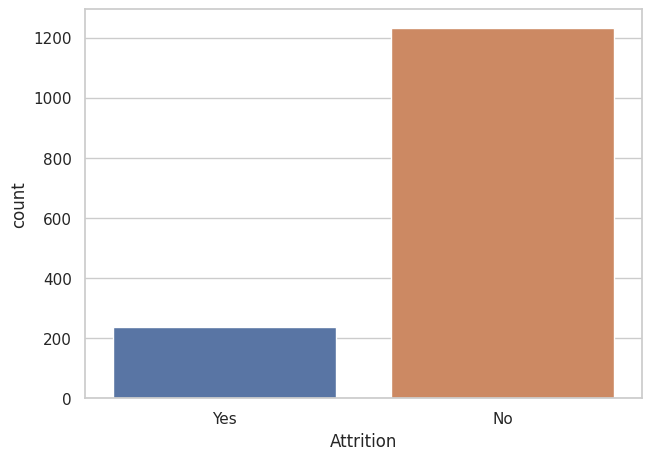

In [34]:
plot_cat('Attrition')

Note that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques. I shall come back to this point later.

Let us now similalry analyze other categorical features.

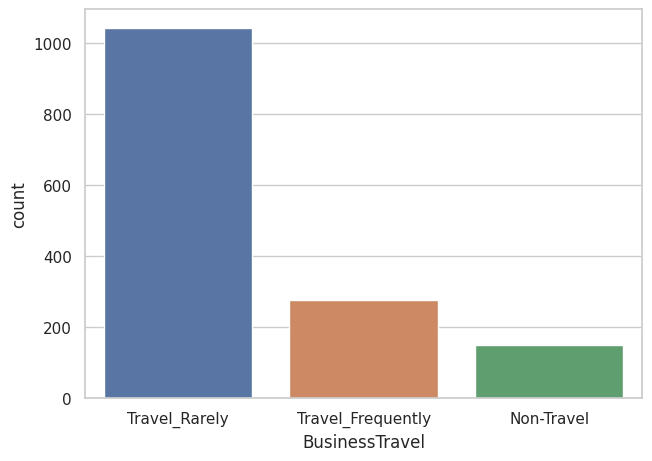

In [42]:
plot_cat('BusinessTravel')

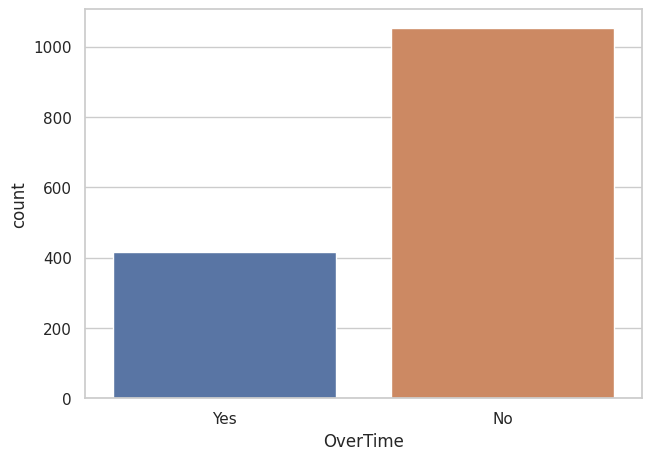

In [43]:
plot_cat('OverTime')

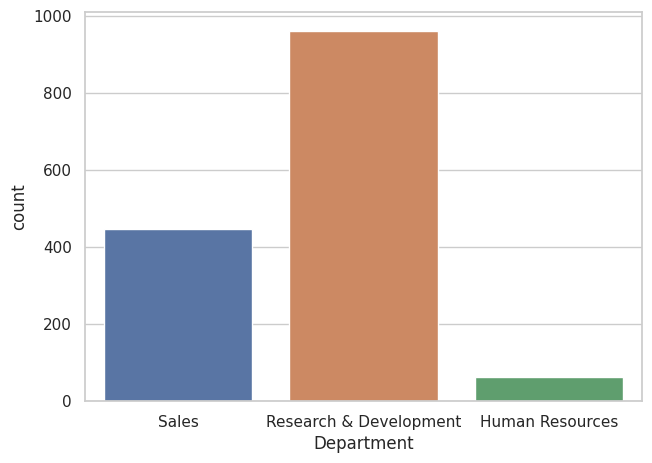

In [44]:
plot_cat('Department')

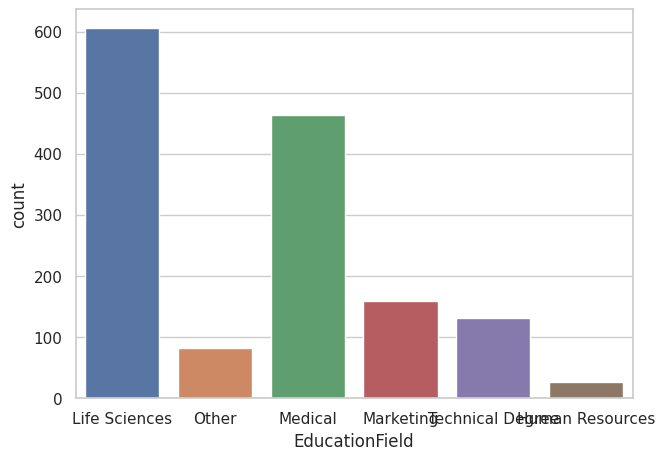

In [45]:
plot_cat('EducationField')

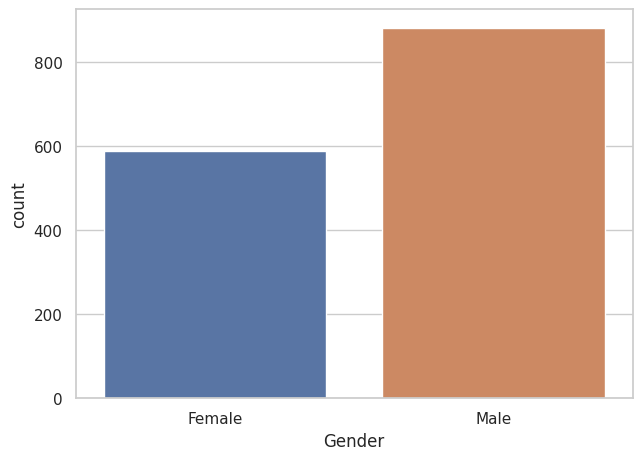

In [46]:
plot_cat('Gender')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

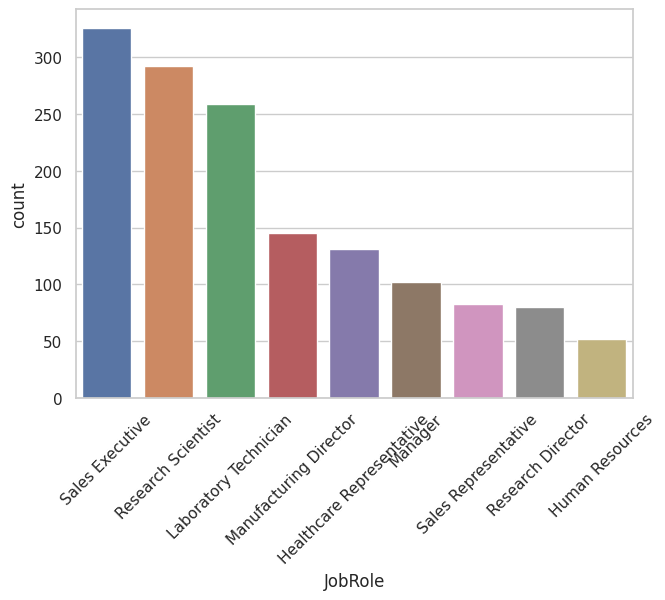

In [49]:
plot_cat('JobRole')
plt.xticks(rotation=45)


Similarly we can continue for other categorical features.

Note that the same function can also be used to better analyze the numeric discrete features like 'Education' ,'JobSatisfaction' etc...

<Axes: >

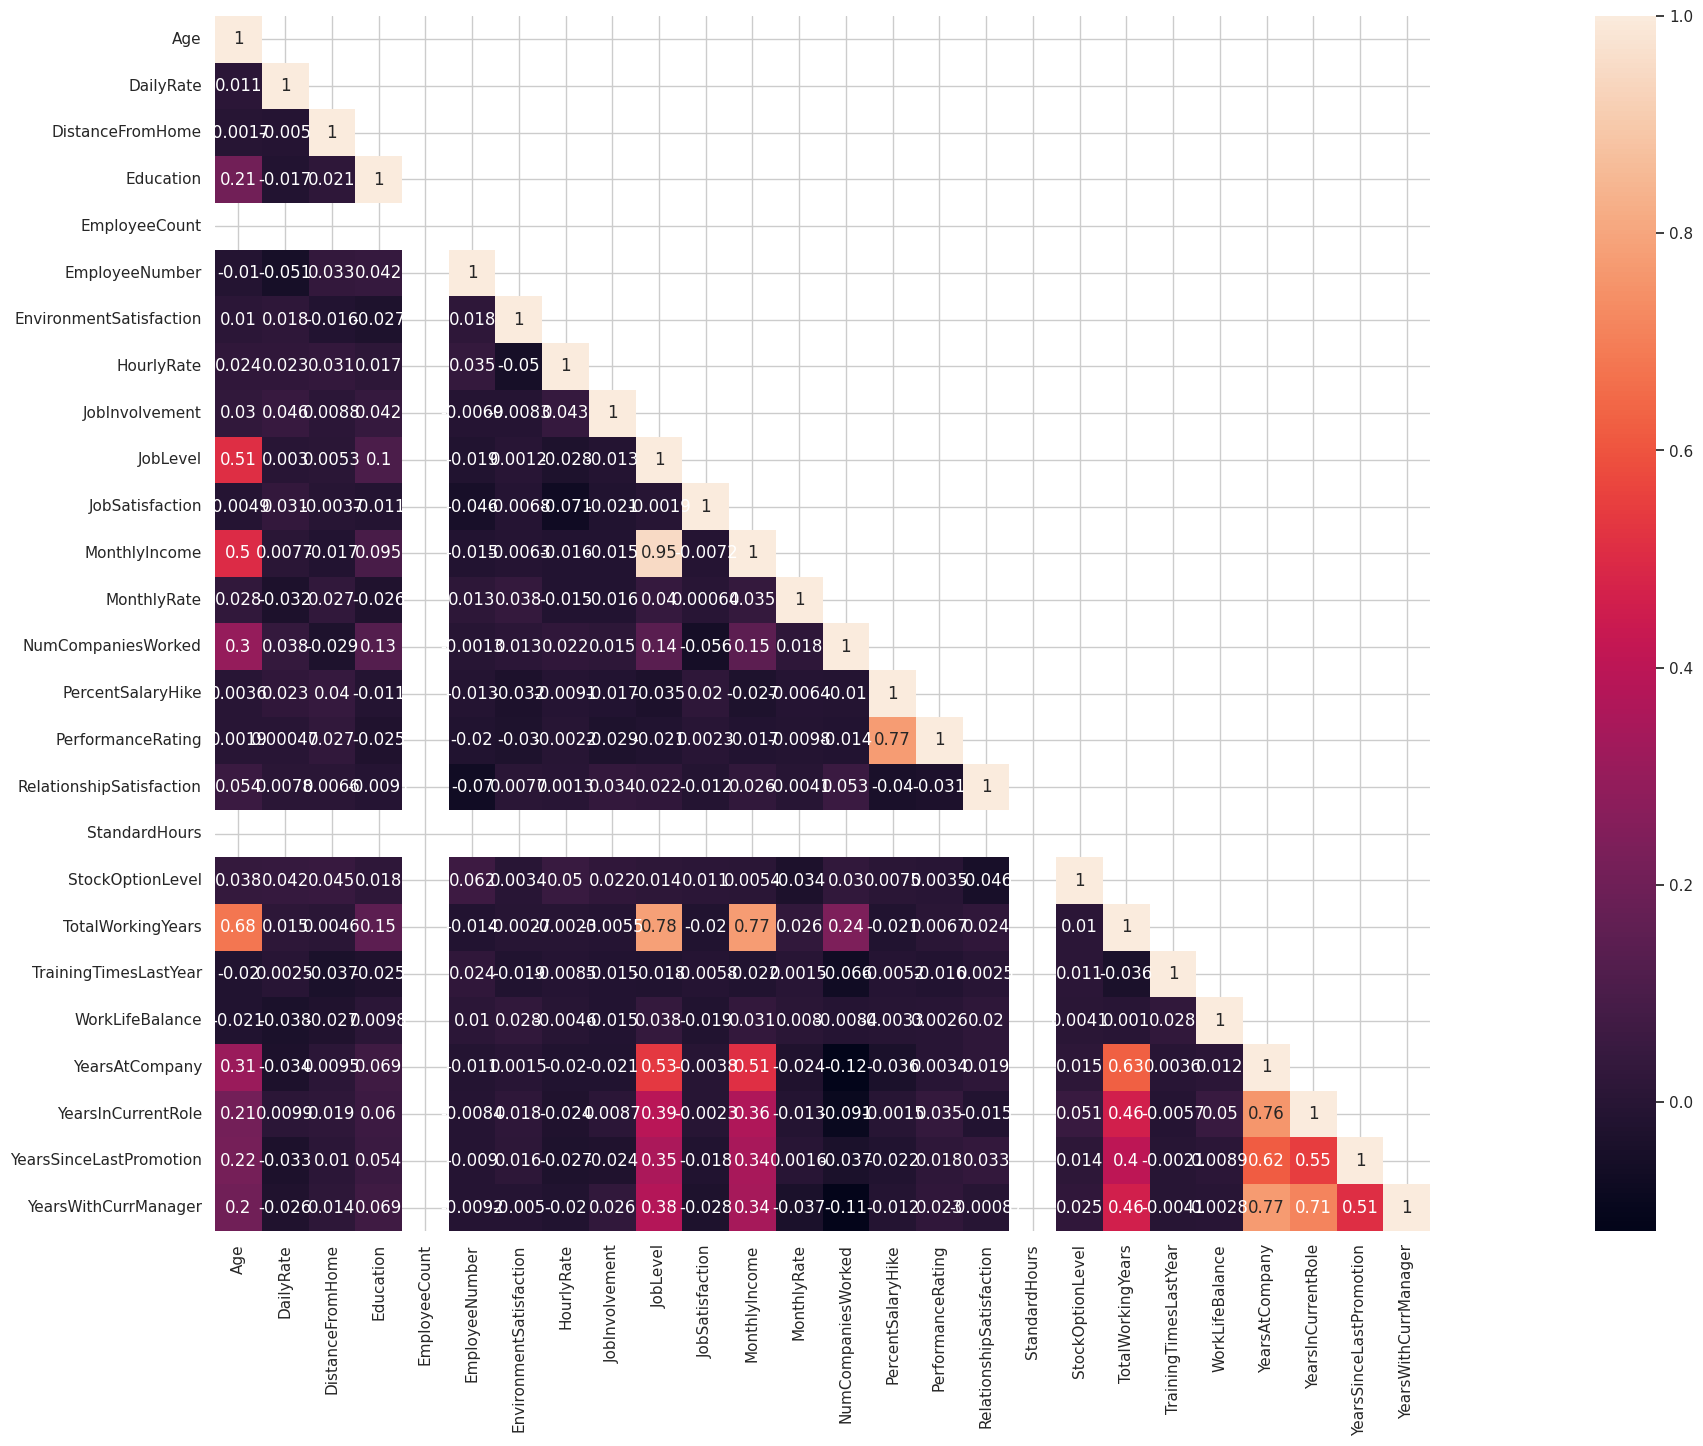

In [51]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(38,15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [52]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##3 ) Feature Selection


**Plotting the Features against the 'Target' variable.**

<Axes: xlabel='Attrition', ylabel='Age'>

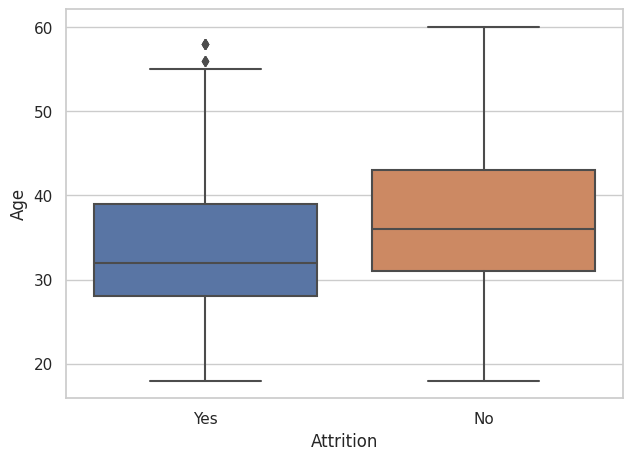

In [57]:
sns.boxplot(data=df,y='Age',x='Attrition')

In [58]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

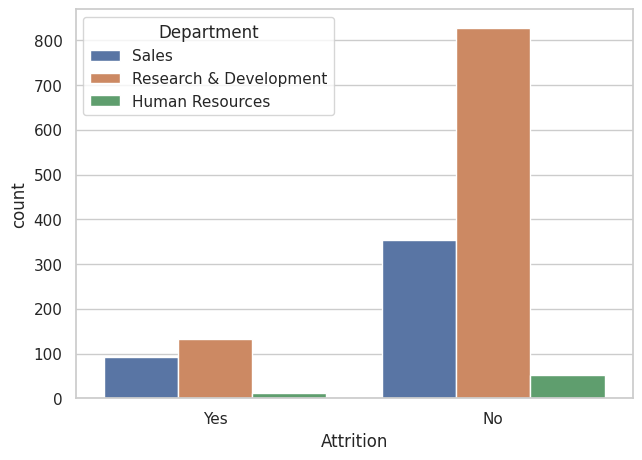

In [61]:
sns.countplot(data=df,x='Attrition',hue='Department')

In [62]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


In [63]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


In [64]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

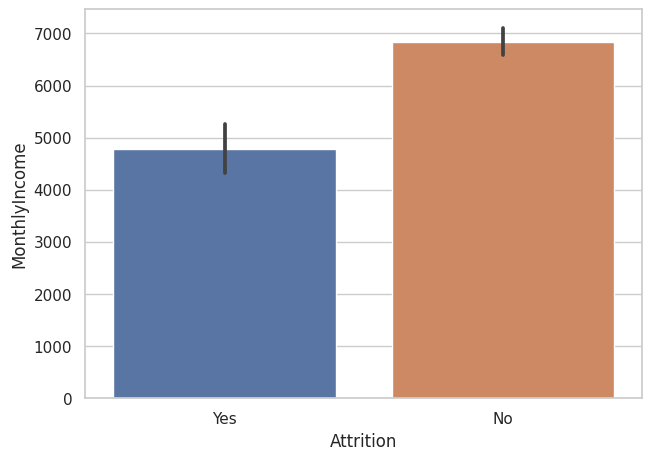

In [67]:
sns.barplot(data=df,x='Attrition',y='MonthlyIncome')

<Axes: xlabel='Attrition', ylabel='count'>

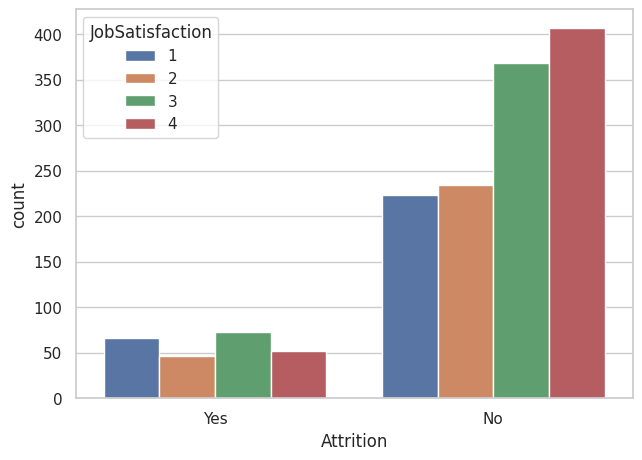

In [68]:
sns.countplot(data=df,x='Attrition',hue='JobSatisfaction')

In [69]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [70]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [71]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [72]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [73]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [74]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

#Preparing Dataset

In [75]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)


In [76]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [77]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [78]:
df.head() # just to verify.

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


**Feature Scaling**

In [82]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].to_numpy()

In [83]:
Y=to_categorical(Y)
Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Splitting the data into training and validation sets

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# **Making Predictions Using an Artificial Neural Network (ANN)**

In [85]:
np.random.seed(42)

In [86]:
rn.seed(42)

In [92]:
tf.random.set_seed(42)

**Building the Keras model**

In [94]:
model=Sequential()
model.add(Dense(input_dim=23,units=8,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

In [95]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 192       
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 370
Trainable params: 370
Non-trainable params: 0
_________________________________________________________________


 Fitting the model on the training data and testing on the validation set

In [97]:
History=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Epoch 1/10
35/35 [==============================] - 1s 6ms/step - loss: 0.5236 - accuracy: 0.7858 - val_loss: 0.3622 - val_accuracy: 0.8696
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8285 - val_loss: 0.3499 - val_accuracy: 0.8696
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8285 - val_loss: 0.3524 - val_accuracy: 0.8696
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8285 - val_loss: 0.3551 - val_accuracy: 0.8696
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8294 - val_loss: 0.3644 - val_accuracy: 0.8723
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8630 - val_loss: 0.3670 - val_accuracy: 0.8750
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8784 - val_loss: 0.3760 - val_accuracy: 0.8804
Epoch 8/10
35/35 [==

In [99]:
predicted_probabilities = model.predict(x_test)

# Use NumPy's argmax to get the predicted classes
predicted_classes = np.argmax(predicted_probabilities, axis=1)

12/12 [==============================] - 0s 4ms/step


In [100]:
model.predict(x_test)

12/12 [==============================] - 0s 1ms/step


array([[9.20186818e-01, 8.29117894e-02],
       [9.92365181e-01, 9.26069170e-03],
       [9.91465986e-01, 8.09905306e-03],
       [9.54788506e-01, 4.83069867e-02],
       [9.88824189e-01, 1.14427581e-02],
       [8.07867765e-01, 2.56869912e-01],
       [9.22687948e-01, 7.57260248e-02],
       [9.70033586e-01, 3.05616856e-02],
       [8.94431174e-01, 1.02719367e-01],
       [9.94865298e-01, 5.97966416e-03],
       [4.20777053e-01, 5.63057303e-01],
       [9.90541399e-01, 8.60859361e-03],
       [7.78727233e-01, 2.24489614e-01],
       [9.92791772e-01, 7.04618171e-03],
       [9.88395810e-01, 1.22648971e-02],
       [8.79599810e-01, 1.25592321e-01],
       [9.70321596e-01, 3.06584034e-02],
       [9.48383808e-01, 6.08213097e-02],
       [6.39961183e-01, 4.12879825e-01],
       [8.95823658e-01, 1.46496803e-01],
       [7.94697344e-01, 2.04484150e-01],
       [9.64930952e-01, 3.08846291e-02],
       [9.43875670e-01, 5.38460836e-02],
       [3.31278533e-01, 6.88206255e-01],
       [7.483544

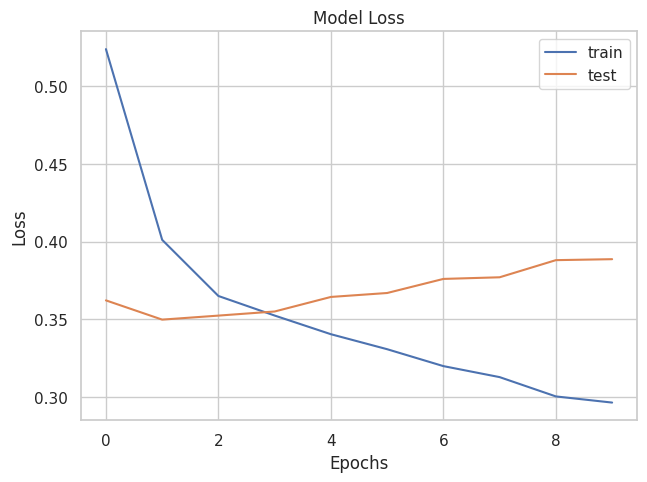

In [101]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

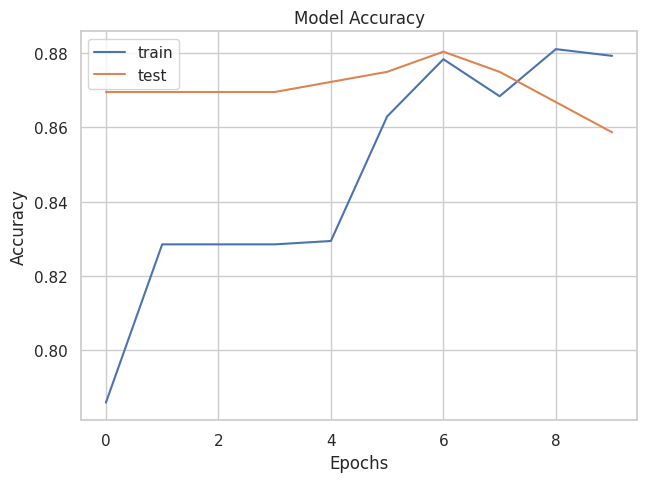

In [104]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

**In order to increase the model performance of the ANN we need to tune the hyperparameters. Some of the hyperparameters include**